# APRENDIZAJE PROFUNDO

Integrantes:

**Alejandra Aguirre Monsalve**

**Daniel Alejandro Manco Vidales**

**Faber Esteban Arcila Galvis**

##Descripción del problema

Una empresa de gran tamaño donde se confesionan todo tipo de prendas de vestir enfrenta desafíos significativos en su logística e inventario debido al proceso manual de clasificación. Esta clasificación de las estanterias y productos es realizada con numeración hecha a mano. Este enfoque ha generado errores humanos frecuentes que impactan negativamente la rotación precisa del inventario. El tiempo requerido para la clasificación manual es excesivo, además, está sujeta a la caligrafía y concentración del operario para escribir la referencia de manera correcta y entendible para los demás operarios. Lo que resulta en la mala clasificación y numeración de productos y estanterias. Esta situación ha afectado la eficiencia del jefe de inventario y la problemática se ha intensificado con el tiempo.

Impacto en la empresa:

1. **Errores en la identificación de estanterias y referencias:** Teniendo en cuenta que la numeración es de manera manual, está sujeta a la caligrafía del operario, haciendo que muchos de estos números no sean legibles, generando retrasos en el proceso.
2. **Ineficiencia en el proceso:** El tiempo prolongado requerido para la clasificación manual limita la capacidad de la empresa para responder rápidamente a la demanda del mercado y para mantener un flujo eficiente en la cadena de suministro.
3. **Acumulación de inventario sin clasificar:** La acumulación de inventario no clasificado aumenta el riesgo de pérdida, deterioro o inexactitudes en los registros de inventario.


Debido a que se están generando grandes perdidas la empresa decide invertir en una solución que le permita:

1. **Reconocer patrones numéricos manuales:** A través de una herramienta que permita el reconocimiento correcto de la formas numéricas, hará que se identifiquen los números de manera eficiente, esto con miras a una posible migración a un sistema de gestión de inventario avanzado, sin dejar de lado el sistema de numeración actual.

1. **Precisión en la clasificación:** La automatización del proceso reduciría significativamente los errores humanos, asegurando una clasificación precisa del inventario y una mejor gestión de la rotación de productos.

2. **Ahorro de tiempo:** Al eliminar la necesidad de clasificación manual, se optimizaría el tiempo empleado en esta tarea, permitiendo una gestión más ágil y eficiente del inventario.

3. **Reducción de pérdidas:** La identificación rápida y precisa de productos en mal estado minimizaría las pérdidas por productos no vendidos o desechados.

##Solución Propuesta

 **Objetivo**

 Implementar un sistema automatizado de detección de objetos en imágenes para identificar las formas de los números y hacer la migración a un sistema de gestión de inventarios actualizado sin dejar de lado el sistema numérico estandarizado en la empresa, para asi clasificar el inventario de forma precisa y eficiente.

 Con el fin de dar solución al problema de inventarios se utilizarán  conjuntos de datos como MNIST  para desarrollar un modelo capaz de reconocer los números hechos a mano y así actualizar su sistema de inventarios.

**Beneficios:**

1. **Precisión en la clasificación:** La red neuronal ofrecerá una clasificación más precisa en comparación con los métodos manuales, reduciendo drásticamente los errores en la rotación del inventario.

2. **Eficiencia en el proceso:** Al automatizar la clasificación, se reducirá significativamente el tiempo empleado en la tarea manual, permitiendo una gestión más rápida y eficiente del inventario.

4. **Escalabilidad y mejora continua:** El modelo puede adaptarse a nuevos productos y condiciones cambiantes del inventario, mejorando continuamente su precisión con más datos y entrenamiento.



##Exploración y limpieza de datos

In [ ]:
pip install keras-tuner

In [ ]:
### Carga de paquetes y librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import tensorflow as tf #Framework para deep learning
from tensorflow import keras #API que contiene la mayoría de funciones para las RN
from keras_tuner.tuners import RandomSearch
import keras_tuner as kt
from sklearn import metrics

In [ ]:
### Carga de datos fasion_mnist
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Se especifica la dimension de las imagenes con el canal (escala de grises)
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [ ]:
#Categorias de la variable respuesta
np.unique(y_train,return_counts=True) # vemos que las categorias no estan 100% balanceadas, en la aplicacion de los modelos, mas adelante, veremos si el desbalance es significativo.
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [ ]:

### Estandarización de los datos
x_train2 = x_train/255 # Valores entre 0 y 1
x_test2 = x_test/255
x_train2.shape

### Definición de la arquitectura para la CNN base
model = keras.models.Sequential()

# Definición de la primera capa convolucional
model.add(
    keras.layers.Conv2D(
        filters = 32, # Cantidad de filtros
        kernel_size = (3,3), # Tamaño de los filtros
        strides = (2,2), # Cantidad de pasos o zancada
        activation = 'relu', # Rectified Linear Unit (ReLU)
        input_shape = (28,28,1) # Tamaño de la imagen
    )
)

In [ ]:
# Definición de la capa de agrupación
model.add(
    keras.layers.MaxPooling2D(
        pool_size = (2,2),
        strides = (2,2)
    )
)


In [ ]:
### Dimensiones de la imagen
filas_img = 28
columnas_img = 28

In [ ]:

# La salida de la capa anterior es un tensor 3D. Se debe conertir a un tensor de 1D
# antes de pasar a las capas densas (Flatten)
model.add(
    keras.layers.Flatten()
)

# Definición de capa totalemente conectada
model.add(
    keras.layers.Dense(
        units = 128,
        activation = 'relu'
    )
)

# Definición de la capa de salida
model.add(
    keras.layers.Dense(
        units= 10,
        activation = 'softmax'
    )
)

# Compilación del modelo
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

# Representación de la arquitectura
keras.utils.plot_model(
    model,
    to_file = 'model.png',
    show_shapes = True,
    show_layer_names = True
)

### Entrenamiento de la CNN
history = model.fit(
    x_train2,
    y_train,
    epochs = 10,
    validation_split = 0.2
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 6, 6, 32)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 128)               147584    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 149194 (582.79 KB)
Trainable params: 149194 (582.79 KB)
Non-trainable params: 0 (0.00 Byte)
________________

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.96      0.98       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



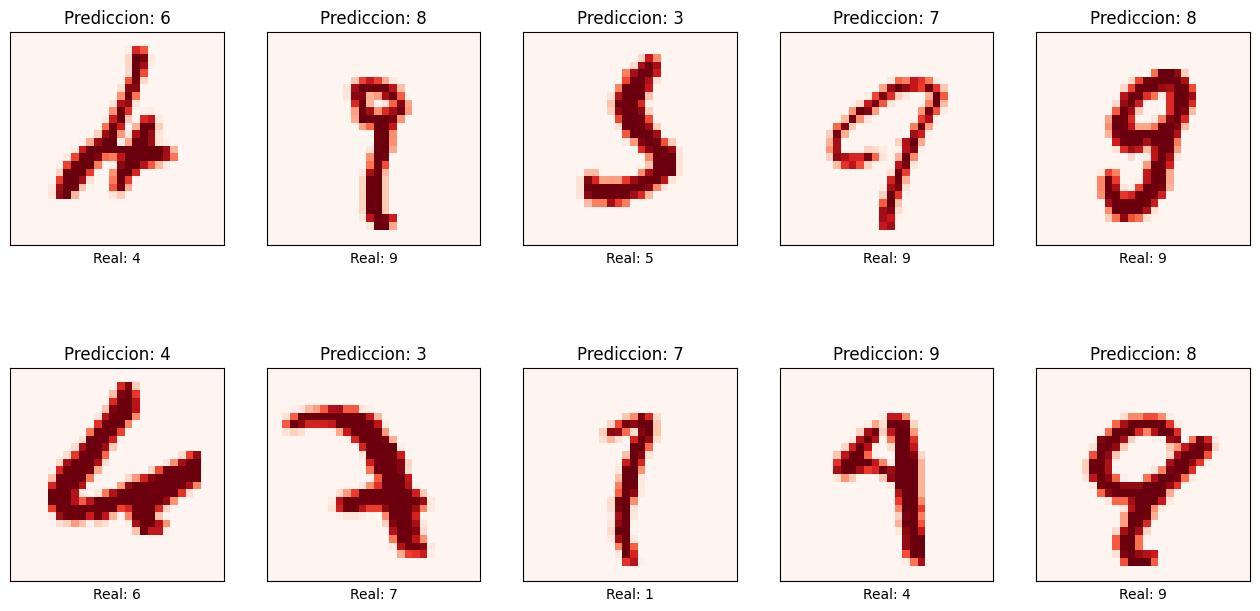

In [ ]:
### Evaluación del modelo con dataset de test
from sklearn.metrics import classification_report
class_names = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']

y_hat = np.argmax(model.predict(x_test2), axis = 1)

print(classification_report(y_test, y_hat, target_names=class_names))

### Errores en la red neuronal
errors = np.nonzero(y_hat != y_test)[0]

# Visualizar las primeras 10 predicciones erroneas
plt.figure(figsize=(16, 8))
for i, incorrect in enumerate(errors[0:10]):
    plt.subplot(2,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[incorrect].reshape(28,28), cmap = 'Reds')
    plt.title("Prediccion: {}".format(class_names[y_hat[incorrect]]))
    plt.xlabel("Real: {}".format(class_names[y_test[incorrect]]))

#Modelo 1

In [ ]:
### ANN 1: red neuronal base
ann1 = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape = [filas_img, columnas_img]),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax')
    ]
)

### Compilacion de la ANN1
ann1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Entrenamiento de la ANN1
history = ann1.fit(x_train2, y_train, epochs = 15, validation_data = (x_test2, y_test))

### Listado de toda la data almacenada en 'history'
print(history.history.keys())

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2395 - accuracy: 0.9284 - val_loss: 0.1256 - val_accuracy: 0.9616
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1027 - accuracy: 0.9686 - val_loss: 0.0944 - val_accuracy: 0.9681
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0709 - accuracy: 0.9780 - val_loss: 0.0849 - val_accuracy: 0.9738
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0524 - accuracy: 0.9835 - val_loss: 0.0754 - val_accuracy: 0.9767
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0425 - accuracy: 0.9863 - val_loss: 0.0778 - val_accuracy: 0.9755
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0342 - accuracy: 0.9887 - val_loss: 0.0758 - val_accuracy: 0.9774
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0278 - accuracy: 0.9907 - val_loss: 0.0893 - val_accu

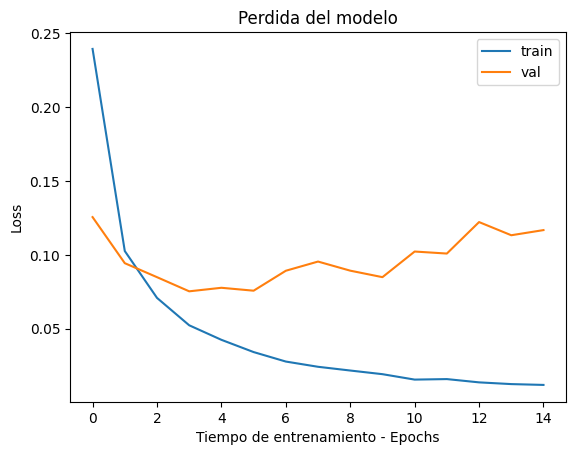

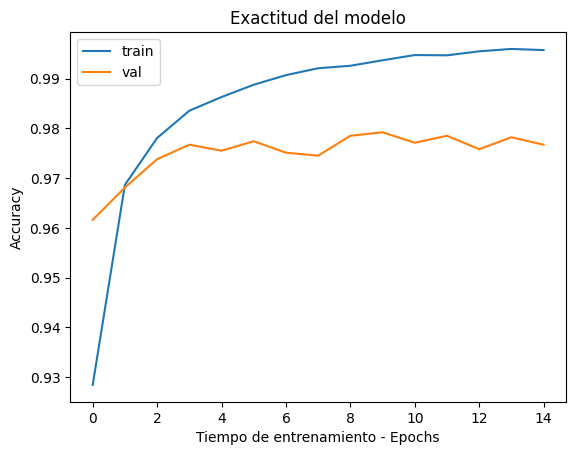

In [ ]:
### Visualización de las curvas de error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

### Visualización de las curvas de error
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exactitud del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()

Respecto a la pérdida del modelo, en los datos de entrenamiento disminuye considerablemente de la época 1 a la 15, lo que sugiere que el modelo está mejorando en la tarea que está aprendiendo. Para el caso de la pérdida con los datos de validación también disminuye, aunque puede haber un ligero aumento después de cierto punto (épocas 10-15), lo que podría indicar un posible sobreajuste.

La precisión de entrenamiento aumenta de manera constante, lo que indica que el modelo está aprendiendo bien los datos de entrenamiento. La precisión de validación también aumenta, lo cual es positivo. Sin embargo, a partir de un número de épocas, empieza a disminuir, esto también es muestra de un posible sobreajuste.

#Modelo 2

In [ ]:
##### REGULARIZACION #####
from tensorflow.keras import regularizers

### ANN 2: red neuronal regularizada
ann2 = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape = [filas_img, columnas_img]),
        keras.layers.Dense(128, activation = 'relu', kernel_regularizer = regularizers.L2(l2 = 0.01)),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax')
    ]
)

In [ ]:
### Compilacion de la ANN2
ann2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Entrenamiento de la ANN2
history_2 = ann2.fit(x_train2, y_train, epochs = 15, validation_data = (x_test2, y_test))

Epoch 1/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5316 - accuracy: 0.9100 - val_loss: 0.3715 - val_accuracy: 0.9311
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3223 - accuracy: 0.9422 - val_loss: 0.2731 - val_accuracy: 0.9557
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2924 - accuracy: 0.9486 - val_loss: 0.2728 - val_accuracy: 0.9552
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2696 - accuracy: 0.9532 - val_loss: 0.2775 - val_accuracy: 0.9509
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2601 - accuracy: 0.9543 - val_loss: 0.2524 - val_accuracy: 0.9582
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2482 - accuracy: 0.9570 - val_loss: 0.2549 - val_accuracy: 0.9548
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2423 - accuracy: 0.9582 - val_loss: 0.2152 - val_accu

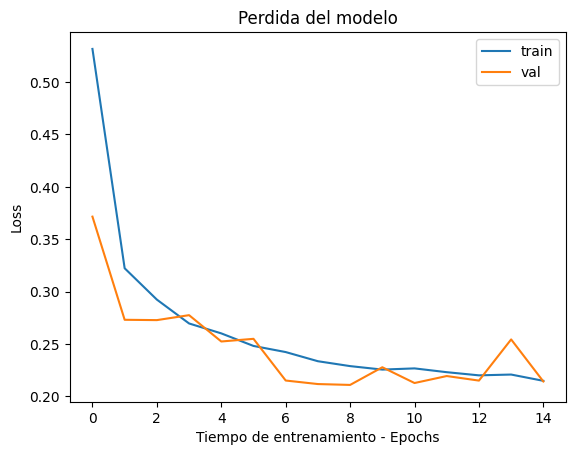

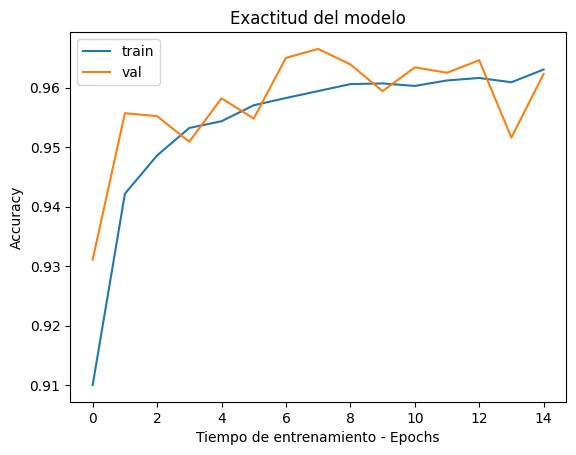

In [ ]:
### Visualización de las curvas de error
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

### Visualización de las curvas de error
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Exactitud del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()

En este caso, la pérdida en los datos de entrenamiento disminuye de manera constante de la época 1 a la 15, lo que indica que el modelo está aprendiendo los datos de entrenamiento cada vez mejor.
La pérdida de validación disminuye inicialmente, pero desde la época 3 hasta la época 8, hay un comportamiento aleatorio, por último, vuelve a retomar una tendencia a bajar en las últimas épocas.

La precisión de entrenamiento también aumenta, alcanzando alrededor del 96.3% al final del entrenamiento.
La precisión de validación alcanza alrededor del 96.2%, lo cual es bastante cercano a la precisión de entrenamiento.


Este modelo, respecto al modelo 1, es sutilmente inferior respecto a las métricas de pérdida y precisión. Sin embargo, es necesario evaluar los patrones de sobreajuste en ambos modelos, ya que las gráficas muestran que posiblemente la red neuronal esté captando caracteristicas especificas de los datos de entrenamiento.


##Modelo 3

In [ ]:
### ANN 3: red neuronal con dropout
ann3 = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape = [filas_img, columnas_img]),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation = 'softmax')
    ]
)

In [ ]:
### Compilacion de la ANN3
ann3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Entrenamiento de la ANN3
history_3 = ann3.fit(x_train2, y_train, epochs = 15, validation_data = (x_test2, y_test))


Epoch 1/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3298 - accuracy: 0.9014 - val_loss: 0.1289 - val_accuracy: 0.9613
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1629 - accuracy: 0.9520 - val_loss: 0.1034 - val_accuracy: 0.9692
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1261 - accuracy: 0.9622 - val_loss: 0.0945 - val_accuracy: 0.9737
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1076 - accuracy: 0.9673 - val_loss: 0.0823 - val_accuracy: 0.9763
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0912 - accuracy: 0.9716 - val_loss: 0.0777 - val_accuracy: 0.9779
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0844 - accuracy: 0.9730 - val_loss: 0.0793 - val_accuracy: 0.9783
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0796 - accuracy: 0.9753 - val_loss: 0.0826 - val_accu

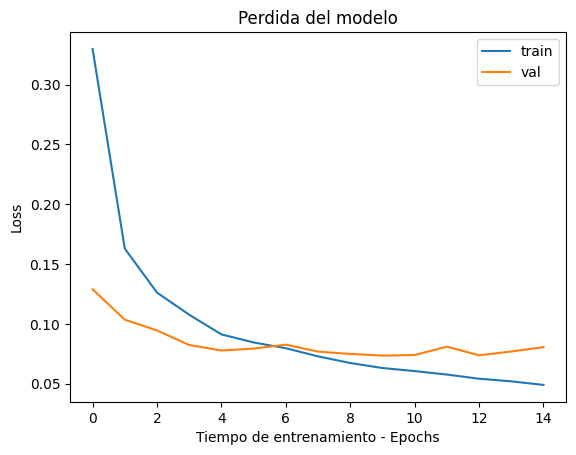

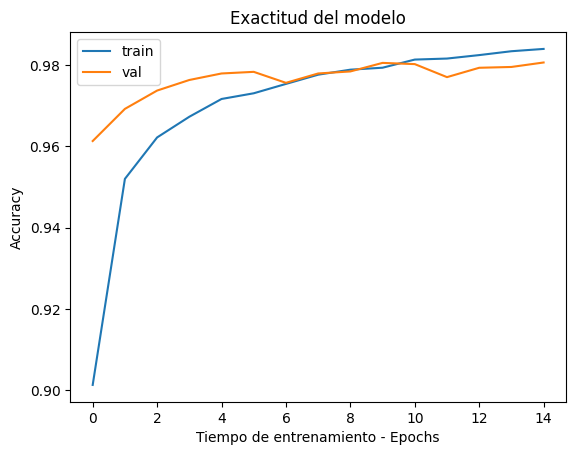

In [ ]:
### Visualización de las curvas de error
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

### Visualización de las curvas de error
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Exactitud del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()

La pérdida de entrenamiento disminuye constantemente de la época 1 a la 15, indicando que el modelo está aprendiendo bien los datos de entrenamiento.
La pérdida de validación también disminuye durante las épocas, aunque hay un ligero aumento hacia el final.

La precisión de entrenamiento aumenta y alcanza un nivel alto del 98.39% al final del entrenamiento.
La precisión de validación alcanza un nivel elevado del 98.06%

Para realizar un análisis general de los 3 modelos se concluye con las siguientes consideraciones:

El primer modelo sigue siendo el mejor en términos de precisión de
entrenamiento, pero el tercer modelo tiene una precisión de validación más alta, lo que sugiere una mejor capacidad de generalización.

El segundo modelo tiene un rendimiento ligeramente inferior tanto en precisión de entrenamiento como de validación en comparación con los otros dos modelos.



##Ajuste de redes neuronales

In [ ]:

### Definición del Hyper model
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))

    # Defenición de la primera capa oculta con ajuste de hiperparámetros
    # Elegir el valor óptimo entre 32 - 512 neuronas
    hp_units_1 = hp.Int('units_1', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units_1, activation='relu'))

    # Defenición de la segunda capa oculta con ajuste de hiperparámetros
    # Elegir el valor óptimo entre 32 - 512 neuronas
    hp_units_2 = hp.Int('units_2', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units_2, activation='relu'))

    # Definición de la capa de salida
    model.add(keras.layers.Dense(10, activation='softmax'))

    # Definición de la tasa de aprendizaje del optimizador
    # Elegir el valor óptimos entre 0.1, 0.01, 0.001, 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[0.1, 0.01, 0.001, 0.0001])
    model.compile(
        optimizer = keras.optimizers.Adam(learning_rate= hp_learning_rate),
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
    )

    return model

In [ ]:
### Definción del tuner
tuner = RandomSearch(
    build_model,
    objective= 'val_accuracy',
    max_trials=5,
    executions_per_trial= 3,
    directory = 'results_tuner',
    project_name = 'fashion_mnist'

)


In [ ]:
### Ejecución del Tuner
tuner.search(x_train2, y_train, epochs=5, validation_data= (x_test2, y_test))


Trial 5 Complete [00h 05m 04s]
val_accuracy: 0.19063333173592886

Best val_accuracy So Far: 0.9783333341280619
Total elapsed time: 00h 23m 42s


In [ ]:
### Mostrar el mejor modelo
for h_param in [f"units_{i}" for i in range(1,3)] + ['learning_rate']:
                print(h_param, tuner.get_best_hyperparameters()[0].get(h_param))

units_1 512
units_2 416
learning_rate 0.001


In [ ]:
### Almacenar el mejor modelo
best_model = tuner.get_best_models()[0]
### Definir la arquitectura del modelo según hiperparámetros optimos
best_model.build(x_train2.shape)
### Resumen de la arquitectura
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 416)               213408    
                                                                 
 dense_2 (Dense)             (None, 10)                4170      
                                                                 
Total params: 619498 (2.36 MB)
Trainable params: 619498 (2.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
### Ajuste de la red neuronal con hiperparámetros optimos
history = best_model.fit(x_train2, y_train, epochs=10, validation_data = (x_test2, y_test))

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 0.0324 - accuracy: 0.9890 - val_loss: 0.0826 - val_accuracy: 0.9783
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.0821 - val_accuracy: 0.9811
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.0909 - val_accuracy: 0.9772
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0234 - accuracy: 0.9928 - val_loss: 0.1094 - val_accuracy: 0.9783
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0199 - accuracy: 0.9937 - val_loss: 0.0818 - val_accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0164 - accuracy: 0.9950 - val_loss: 0.1218 - val_accuracy: 0.9777
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0169 - accuracy: 0.9952 - val_loss: 0.1343 -

In [ ]:
### Cual es el epoch con max val_accuracy
val_accuracy_per_epoch = history.history['val_accuracy']
best_epoch = val_accuracy_per_epoch.index(max(val_accuracy_per_epoch))+1
print(f"Best epoch: {best_epoch}")

Best epoch: 10


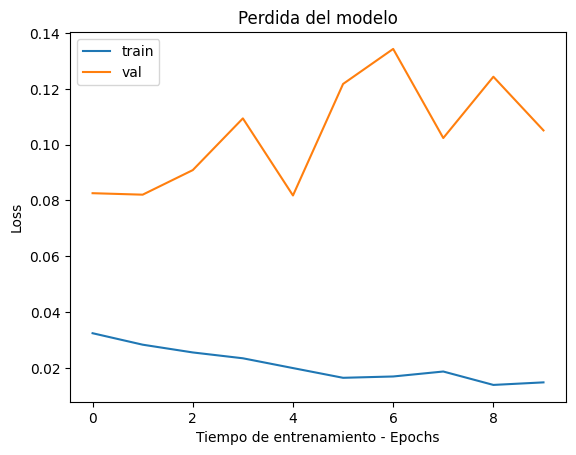

In [ ]:
### Visualización de las curvas de error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()


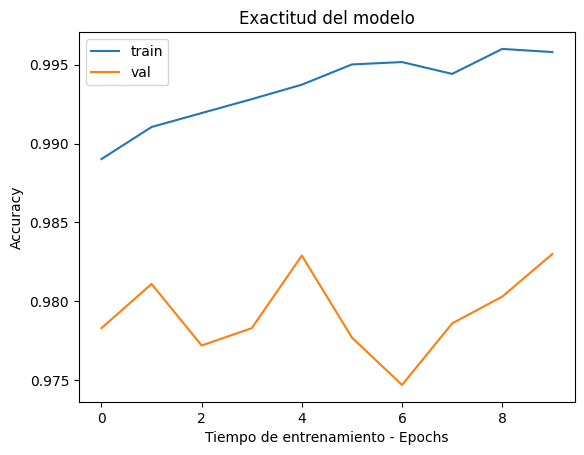

In [ ]:
### Visualización de las curvas de error
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exactitud del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()

In [ ]:

### Utilizar el metodo evaluate para evaluar la red neuronal
test_loss, test_accuracy = best_model.evaluate(x_test2, y_test)
print('Test accuracy: ', test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.1051 - accuracy: 0.9830
Test accuracy:  0.9829999804496765


In [ ]:
#Resumen de todas las corridas realizadas con el proceso de afinamiento de hiperparametros
tuner.results_summary() #resumen de las corridas
#este metodo no mejora signficativametelas mertricas de desempeñ o de modelo

Results summary
Results in results_tuner/fashion_mnist
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
units_1: 512
units_2: 416
learning_rate: 0.001
Score: 0.9783333341280619

Trial 1 summary
Hyperparameters:
units_1: 288
units_2: 256
learning_rate: 0.0001
Score: 0.9731000065803528

Trial 3 summary
Hyperparameters:
units_1: 480
units_2: 192
learning_rate: 0.01
Score: 0.9598999818166097

Trial 2 summary
Hyperparameters:
units_1: 96
units_2: 288
learning_rate: 0.01
Score: 0.9547333319981893

Trial 4 summary
Hyperparameters:
units_1: 512
units_2: 288
learning_rate: 0.1
Score: 0.19063333173592886


In [ ]:
#Metricas de desempeño del mejor modelo encontrado

ann_winner=tuner.get_best_models(num_models=3)[0] #obtener los dos mejores modelos y de ellos el primero(0)

pred=np.argmax(ann_winner.predict(x_test2), axis=1) #prediccion sobre x_test2 usando el modelo ganador

print(metrics.classification_report(y_test,pred))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.97      0.97      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Este modelo con afinamiento de hiperparametros, supera a los modelos anteriores tanto en precisión de entrenamiento como de validación.

En términos de precisión de validación, este modelo muestra un rendimiento superior.

##Ajustar modelo de Shallow Learnig

In [ ]:
n_obs_tr=x_train.shape[0] #numero de observaciones de train
n_obs_te=x_test.shape[0] #numero de observaciones de test
fxc = filas_img*columnas_img

In [ ]:
#reshape
x_train_rf=x_train2.reshape(n_obs_tr,fxc) #se realiza re_shape para dejar vectores que pueda usar el algoritmo de rf
x_test_rf=x_test2.reshape(n_obs_te,fxc)

###ajustar modelo
rf1=RandomForestClassifier(max_depth = 7)
rf1.fit(x_train_rf,y_train)# ajustar o entrenar a datos
##analizar desempeño de el modelo random forest
pred_tr=rf1.predict(x_train_rf)  ###predicciones en entrenamiento
pred_te=rf1.predict(x_test_rf)   ##predicciones en evaluacion
print( metrics.classification_report(y_train,pred_tr))
print( metrics.classification_report(y_test,pred_te))


              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5923
           1       0.92      0.98      0.95      6742
           2       0.93      0.91      0.92      5958
           3       0.90      0.89      0.89      6131
           4       0.93      0.89      0.91      5842
           5       0.94      0.87      0.90      5421
           6       0.94      0.96      0.95      5918
           7       0.93      0.92      0.92      6265
           8       0.89      0.87      0.88      5851
           9       0.83      0.89      0.86      5949

    accuracy                           0.92     60000
   macro avg       0.92      0.91      0.91     60000
weighted avg       0.92      0.92      0.92     60000

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       980
           1       0.95      0.98      0.96      1135
           2       0.92      0.91      0.91      1032
           3       0.90 

En este caso, encontramos una precisión del 92%, pero para este caso, es necesario analizar los valores verdaderos y los de predicción, para este haremos matrices de confusión para los datos de entrenamiento y validación.

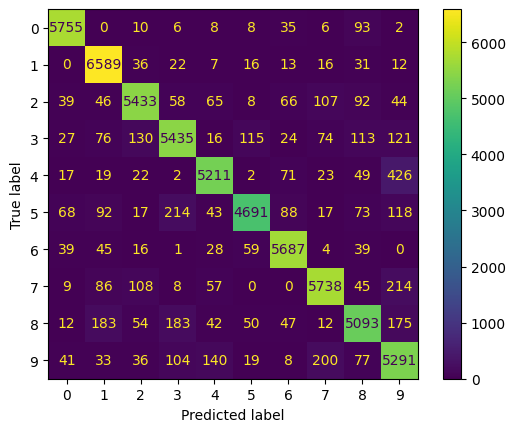

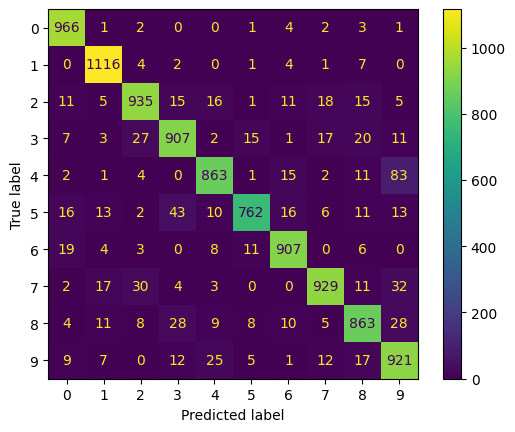

In [ ]:
###matriz de confusion
cm_tr=metrics.confusion_matrix(y_train,pred_tr)###para crear matriz de confusion de entrenamiento
cm_te=metrics.confusion_matrix(y_test,pred_te)###para crear matriz de confusion de test
###graficar matriz de confusion train
disp_tr=metrics.ConfusionMatrixDisplay(cm_tr)
disp_tr.plot()
###graficar matriz de confusion test
disp_te=metrics.ConfusionMatrixDisplay(cm_te)
disp_te.plot()

Al realizar el análisis de la matriz de confusión, en ambos conjuntos de datos (Entrenamiento y Validación), se observa que los valores con menos verdaderos positivos detectados son el 4, 5 y 8. Esto posiblemente se da, porque el 4 tiene un patrón de escritura similar al 9, esto mismo pasa entre el 5 y el 3, también con el 8 y el 3. Esto, podria ser la causa por la cual no se llega a una identificación certeza en todos los tipos de datos, reduciendo la capacidad de los modelos.

## Conclusiones

1. Las métricas de precisión, recall y F1-score son bastante altas en todas las clases. Esto sugiere que el modelo es capaz de distinguir y clasificar con precisión la mayoría de las clases.

2. En general, la precisión y la recall son altas y están cercanas entre sí para la mayoría de las clases. Esto indica que el modelo no solo está prediciendo con precisión, sino que también está recuperando la mayoría de las instancias relevantes para cada clase.

3. Las métricas son consistentes en todas las clases, lo que sugiere que el modelo no está sesgado hacia ninguna clase específica y funciona bien en todas ellas.

4. La precisión global del modelo en el conjunto de datos de prueba es alta (98%). Esto sugiere que el modelo generaliza bien y tiene un buen rendimiento en datos que no ha visto durante el entrenamiento.

5. La precisión del modelo permite reconocer y clasificar correctamente los números manuales. Esta métrica es crucial, ya que determinará la confiabilidad del sistema en la identificación de referencias y estanterías.

6. Es importante comparar el rendimiento del modelo con el proceso manual actual para determinar la reducción de errores. Si el modelo logra minimizar significativamente los errores en la identificación y clasificación, se habrá alcanzado uno de los objetivos clave.

7. Se debe tener en cuenta que factores como la caligrafia y el patrón de escritura de los números jugan un papel relevante en la identificación correcta por parte del modelode redes neuronales, ya que puede llevar a esta a una mala identificación de los números, como se evidenció en las matrices de confusión.